In [3]:
# import libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
from sklearn.utils import resample
pd.set_option('display.max_columns', 1000)
%matplotlib inline 
import warnings; warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('clean_data.csv')

In [5]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,hdi
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.939
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.939
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.961
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.667
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.939


In [6]:
df['no_show']=np.where(df['no_show']=='No',1,0)

In [7]:
df3=df

In [8]:
df.tail()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,hdi
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1,0.684
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1,0.684
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1,0.684
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1,0.684
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1,0.684


In [9]:
df_patient = df

In [10]:
df_patient['patient_id'].astype('str')

0          29872499824296.0
1         558997776694438.0
2           4262962299951.0
3            867951213174.0
4           8841186448183.0
                ...        
110522      2572134369293.0
110523      3596266328735.0
110524     15576631729893.0
110525     92134931435557.0
110526    377511518121127.0
Name: patient_id, Length: 110527, dtype: object

In [11]:
df_patient.patient_id.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: patient_id, Length: 62299, dtype: int64

In [12]:
a = 9.963767e+10

In [13]:
a

99637670000.0

In [14]:
df_patient[df_patient['patient_id']==377511518121127.0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,hdi
41009,3.775115e+14,5538529,F,2016-04-01T12:38:13Z,2016-05-04T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1,0.684
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1,0.684


In [15]:
df.appointment_day.describe()

count                   110527
unique                      27
top       2016-06-06T00:00:00Z
freq                      4692
Name: appointment_day, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  int64  
 14  hdi              110527 non-null  float64
dtypes: float64(2), int64(9), object(4)
memory usage: 12.6+ MB


In [17]:
## Converting the date information in string to datetime type:
df['scheduled_day'] = pd.to_datetime(df.scheduled_day)
df['appointment_day'] = pd.to_datetime(df.appointment_day)
## Creating a new column (attribute) containing just the scheduling time:
#df['schedule_time'] = df.scheduled_day.dt.time
## Normalizing the "Day" columns to keep just the date information (dropping the time info)
df['scheduled_day'] = df.scheduled_day.dt.normalize()
df['day_of_week']= df.appointment_day.dt.day_name()

In [18]:
#waiting days
df['waiting_days'] = df['appointment_day'] - df['scheduled_day']


In [19]:
df['waiting_days'] = df.waiting_days.dt.days  #Extract just the day value from the full "timedelta" object

In [20]:
## Checking which instances were scheduled after the appointment:
df[df['waiting_days'] <0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,hdi,day_of_week,waiting_days
27033,7.839273e+12,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,0.642,Monday,-1
55226,7.896294e+12,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,0.645,Tuesday,-1
64175,2.425226e+13,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,0.706,Wednesday,-1
71533,9.982316e+14,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,0.645,Thursday,-6
72362,3.787482e+12,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,0.953,Tuesday,-1


In [21]:
## Recording the inconsistent instances index 
dropIx = df[df['waiting_days'] < 0].index
## Dropping these instances from the dataset:
df.drop(dropIx, inplace=True)

In [22]:
## Grouping by the 'WaitingDays' and 'No_show' values:
waitingdays = df.groupby(by=['waiting_days','no_show'])

In [23]:
waitingdays = waitingdays.count()['patient_id'].unstack()

In [24]:
waitingdays.fillna(value=0, inplace=True)
waitingdays.reset_index(drop=False, inplace=True)
waitingdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waiting_days  129 non-null    int64  
 1   0             129 non-null    float64
 2   1             129 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [25]:
waitingdays

no_show,waiting_days,0,1
0,0,1792.0,36771.0
1,1,1113.0,4100.0
2,2,1602.0,5123.0
3,3,644.0,2093.0
4,4,1231.0,4059.0
...,...,...,...
124,155,6.0,4.0
125,162,2.0,9.0
126,169,1.0,7.0
127,176,6.0,10.0


In [26]:
## Defining the categories label:
categories = pd.Series(['same day: 0', 'short: 1-3', 'week: 4-7', 'fortnight: 8-15', 'month: 16-30', 'quarter: 31-90', 'season: 91-180'])




In [27]:
## Applying these categories both to the auxiliary and to the working datasets:
waitingdays['waiting_days'] = pd.cut(waitingdays.waiting_days, bins = [-1,0,3,7,15,30,90,180], labels=categories)
df['waiting_categories'] = pd.cut(df.waiting_days, bins = [-1,0,3,7,15,30,90,180], labels=categories)



In [28]:
## Grouping the dataset by the waiting categories, returning the sum of all instances:
waitingdays = waitingdays.groupby('waiting_days').sum()
## Creating a new attribute, "No-showing rate", relating how many patients did not show up against those who did.
waitingdays['no_showing_rate'] = (waitingdays[0]/ waitingdays[1])*100

In [29]:
waitingdays

no_show,0,1,no_showing_rate
waiting_days,,,
same day: 0,1792.0,36771.0,4.873406
short: 1-3,3359.0,11316.0,29.683634
week: 4-7,4413.0,13097.0,33.694739
fortnight: 8-15,4166.0,9362.0,44.499039
month: 16-30,5159.0,10709.0,48.174433
quarter: 31-90,3369.0,6792.0,49.602473
season: 91-180,56.0,161.0,34.782609


In [30]:
appoints =df.groupby(by=['patient_id','no_show'])
appoints = appoints.count()['appointment_day'].unstack()

In [31]:
appoints

no_show,0,1
patient_id,,
3.921784e+04,NaN,1.0
4.374176e+04,NaN,1.0
9.377953e+04,NaN,1.0
1.417242e+05,NaN,1.0
5.376153e+05,NaN,1.0
...,...,...
9.999320e+14,NaN,5.0
9.999350e+14,NaN,1.0
9.999465e+14,NaN,1.0


In [32]:
df.head(22)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,hdi,day_of_week,waiting_days,waiting_categories
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0.939,Friday,0,same day: 0
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0.939,Friday,0,same day: 0
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0.961,Friday,0,same day: 0
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0.667,Friday,0,same day: 0
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0.939,Friday,0,same day: 0
5,9.598513e+13,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1,0.691,Friday,2,short: 1-3
6,7.336882e+14,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0,0.647,Friday,2,short: 1-3
7,3.449833e+12,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0,0.647,Friday,2,short: 1-3
8,5.639473e+13,5638447,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,1,0.735,Friday,0,same day: 0
9,7.812456e+13,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,1,0.719,Friday,2,short: 1-3


### Generation feature



#### Breakdown of Generations:
The Interbellum Generation (or GI Generation)
Born in 1901 or earlier.

The Greatest Generation (or GI Generation)
Born in 1901 - 1924

The Silent Generation
Born 1925-1945 (Sometimes listed as 1925-1942).

Baby Boomers
Born 1946-1964 (Sometimes listed as 1943-1964)

Generation X
Born 1965-1980 (Sometimes listed as 1965-1979)

Millennials
Born 1981-1996 (Sometimes listed as 1980-2000)

Generation Z or Gen Z (sometimes called post-millennials)
Born 1997-2012

Generation Alpha 
Born 1998-current

In [33]:
df['current_year'] = 2017

In [34]:
df['year_birth'] = df['current_year'] - df['age']

In [35]:
bins = [1890, 1901, 1925, 1946, 1965, 1981, 1997, 2012, 2020]

bins_year_birth = pd.cut(df['year_birth'], bins, include_lowest = False, labels = ('interbellum', 'greatest', 'silent', 'boomer', 'x', 'millennial', 'zoomer', 'alpha'))
df['generation'] = bins_year_birth.cat.as_unordered()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   patient_id          110522 non-null  float64            
 1   appointment_id      110522 non-null  int64              
 2   gender              110522 non-null  object             
 3   scheduled_day       110522 non-null  datetime64[ns, UTC]
 4   appointment_day     110522 non-null  datetime64[ns, UTC]
 5   age                 110522 non-null  int64              
 6   neighbourhood       110522 non-null  object             
 7   scholarship         110522 non-null  int64              
 8   hipertension        110522 non-null  int64              
 9   diabetes            110522 non-null  int64              
 10  alcoholism          110522 non-null  int64              
 11  handcap             110522 non-null  int64              
 12  sms_received    

### At-Risk Feature

at_risk = patients who have 1 or more of the 3 diseases - binary (1 is at risk, 0 is not)

In [37]:
df['at_risk']= np.where(df['hipertension']+df['diabetes']+df['alcoholism'] >= 1,1,0)

In [38]:
df.at_risk.value_counts()

0    85307
1    25215
Name: at_risk, dtype: int64

In [39]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,hdi,day_of_week,waiting_days,waiting_categories,current_year,year_birth,generation,at_risk
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0.939,Friday,0,same day: 0,2017,1955,boomer,1
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0.939,Friday,0,same day: 0,2017,1961,boomer,0
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0.961,Friday,0,same day: 0,2017,1955,boomer,0
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0.667,Friday,0,same day: 0,2017,2009,zoomer,0
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0.939,Friday,0,same day: 0,2017,1961,boomer,1


In [40]:
print("No Show and Show Count of Patients\n")
print(df.groupby(['no_show']).size())

print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['no_show']).size()[0]/(df.groupby(['no_show']).size()[0]+df.groupby(['no_show']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = df.groupby(['no_show']).size()[1]/(df.groupby(['no_show']).size()[0]+df.groupby(['no_show']).size()[1])
print("Percent of Patients who Did `Not Show Up` => {:.2f}%".format(noshow*100))

No Show and Show Count of Patients

no_show
0    22314
1    88208
dtype: int64

NoShow and Show '%' of Patients

Percent of Patients who `Showed Up` => 20.19%
Percent of Patients who Did `Not Show Up` => 79.81%


In [41]:
# df.to_csv('feature_data_clean.csv', index=False)

### Visualization 

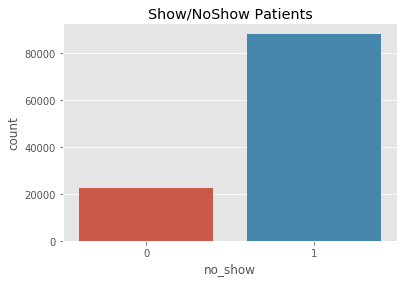

In [40]:
ax = sns.countplot(x=df.no_show, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

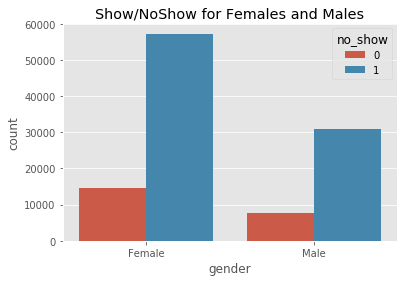

In [41]:
ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

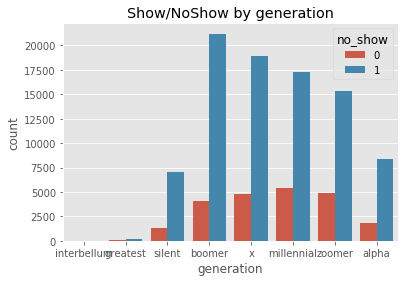

In [42]:
ax = sns.countplot(x=df.generation, hue=df.no_show, data=df)
ax.set_title("Show/NoShow by generation")
x_ticks_labels=['interbellum', 'greatest', 'silent', 'boomer', 'x', 'millennial', 'zoomer', 'alpha']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [43]:
df_age_ratio = df[df.no_show == 1].groupby(['age']).size()/df.groupby(['age']).size()

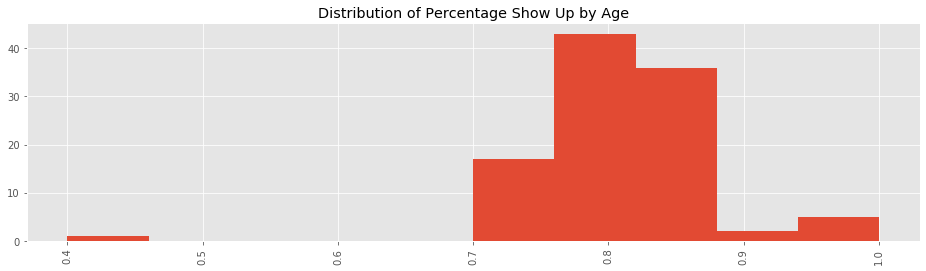

In [44]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

### BASE data

In [46]:
from sklearn.model_selection import train_test_split
data = pd.get_dummies(df, columns=['neighbourhood','gender'],drop_first=True)


In [47]:
X = data.drop(['appointment_id','appointment_day', 'patient_id', 'hdi', 'scheduled_day','day_of_week', 'waiting_days', 'waiting_categories',
       'current_year', 'year_birth', 'generation', 'at_risk','no_show' ], axis = 1) 
y = data['no_show']

### LOG REG base

In [48]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight= 'balanced' )
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', f1_score(y_test, y_pred_class))


0.6055155441352105
Test F1 score:  0.7158498435870699


In [50]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [51]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 3001  2539]
 [ 8361 13730]]


In [52]:
y_test.value_counts()

1    22091
0     5540
Name: no_show, dtype: int64

### LOG REG Model Features

In [89]:
df3.column

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'hdi', 'day_of_week', 'waiting_days', 'waiting_categories',
       'current_year', 'year_birth', 'generation', 'at_risk'],
      dtype='object')

In [90]:
from sklearn.model_selection import train_test_split
data2 = pd.get_dummies(df, columns=['gender','day_of_week', 'generation'],drop_first=True)


In [91]:
#assignnig target and features and dropping the unecessary 
X1 = data2.drop(['appointment_id','appointment_day', 'patient_id','neighbourhood','waiting_categories',
                 'scheduled_day',
       'current_year', 'year_birth','no_show' ], axis = 1) 
y1 = data2['no_show']

In [92]:
#Split data
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=1)

In [93]:
#log reg 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight= 'balanced' )
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print('Acuuracy score: ',metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', f1_score(y_test, y_pred_class))

Acuuracy score:  0.6684521009011617
Test F1 score:  0.7701994230528032


In [94]:
classes = ['no_show', 'showed']
cm= metrics.confusion_matrix(y_test, y_pred_class)
cm


array([[ 3118,  2422],
       [ 6739, 15352]])

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 4546   994]
 [10626 11465]]


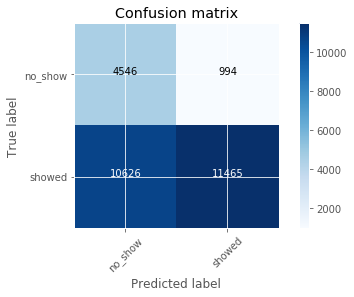

In [84]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## FEATURE SELECTION

### LASSO

In [104]:
from sklearn.model_selection import train_test_split
data3 = pd.get_dummies(df, columns=['gender','day_of_week', 'generation'],drop_first=True)


In [105]:
#assignnig target and features and dropping the unecessary 
X2 = data3.drop(['appointment_id','appointment_day', 'patient_id','neighbourhood','waiting_categories',
                 'scheduled_day',
       'current_year', 'year_birth','no_show' ], axis = 1) 
y2 = data3['no_show']

In [106]:
#Split data
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

In [107]:
# training the model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, normalize = False)
lasso = lasso.fit(X_train2, y_train2)
y_train_pred2 = lasso.predict(X_train2)
y_pred2 = lasso.predict(X_test2)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
print('Training Root Mean Squared Error:' , train_rmse)
print("Testing Rooot Mean Squared Error:" , test_rmse)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train2, (y_train_pred2)))
print("R^2 Test Score:", metrics.r2_score(y_test2, y_pred2))

Training Root Mean Squared Error: 0.39376712850800416
Testing Rooot Mean Squared Error: 0.39259141921906254
R^2 Train Score: 0.03939709215440901
R^2 Test Score: 0.03849915220786504


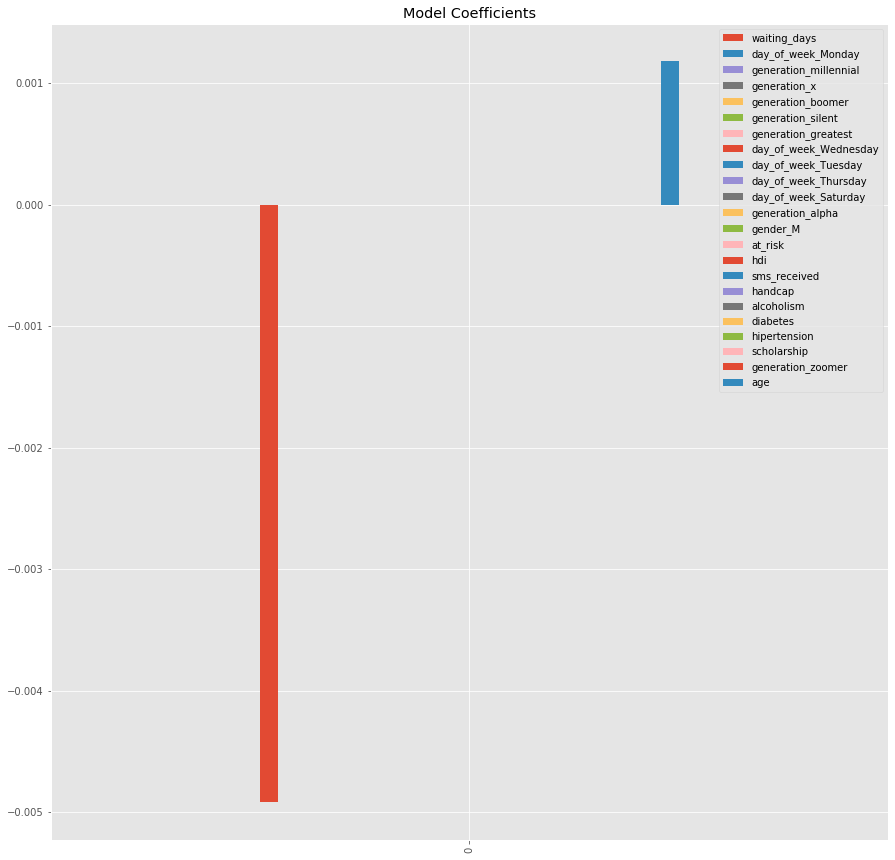

In [108]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train2.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Model Coefficients', legend=True, figsize=(15,15))

###  Recursive Feature Elimination

In [87]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std

In [88]:
z_model=LogisticRegression(class_weight='balanced', solver= 'lbfgs' )
rfe = RFE(z_model, 15)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
Selected Features: [False  True False False  True False  True False False False False False
  True False False False  True False False  True  True  True  True  True
  True  True  True  True  True]
Feature Ranking: [12  1  9  3  1  4  1  2 11  8  5 15  1  6 14 10  1 13  7  1  1  1  1  1
  1  1  1  1  1]


In [65]:
dictionary2 = dict(zip(list(X_train.columns), list(fit.ranking_)))

In [66]:
dictionary2

{'age': 9,
 'scholarship': 1,
 'hipertension': 7,
 'diabetes': 1,
 'alcoholism': 1,
 'handcap': 3,
 'sms_received': 1,
 'hdi': 1,
 'waiting_days': 5,
 'at_risk': 8,
 'gender_M': 6,
 'day_of_week_Monday': 1,
 'day_of_week_Saturday': 1,
 'day_of_week_Thursday': 1,
 'day_of_week_Tuesday': 1,
 'day_of_week_Wednesday': 1,
 'generation_greatest': 1,
 'generation_silent': 1,
 'generation_boomer': 1,
 'generation_x': 4,
 'generation_millennial': 1,
 'generation_zoomer': 1,
 'generation_alpha': 2}

In [67]:
len(X_train.columns)

23

### RFE with 8 features

In [68]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
z_model=LogisticRegression(class_weight= 'balanced' )
pipeline = Pipeline(steps=[('s',rfe),('m',z_model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise',verbose=1 )
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy: 0.692 (0.005)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min finished


In [69]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=8)),
                ('m', LogisticRegression(class_weight='balanced'))])

In [70]:
y_hat = pipeline.predict(X_test)
print(metrics.accuracy_score(y_test, y_hat))
print('Test F1 score: ', f1_score(y_test, y_hat))

0.6905649451702798
Test F1 score:  0.7921528588098017


### Finding the best n_features

In [71]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(8,15):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = LogisticRegression(class_weight= 'balanced' )
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


In [72]:
# get the models to evaluate
models = get_models()

In [73]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>8 0.692 (0.005)
>9 0.691 (0.006)
>10 0.688 (0.006)
>11 0.672 (0.010)
>12 0.668 (0.005)
>13 0.668 (0.005)
>14 0.668 (0.005)


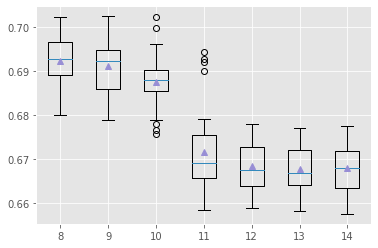

In [77]:
#plot model performance for comparison

plt.boxplot(results, labels=names, showmeans=True)
plt.show()